In [10]:
import pandas
import lib.csse_covid_19_dataset.data_processing as data_processing

data_kind = "deaths"
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'

df_csse_covid_19_dataset = pandas.read_csv(data_url, infer_datetime_format=True, parse_dates=True)
df_prep = data_processing.getCasesPerDayAndCountry(df_csse_covid_19_dataset)

In [11]:
import data

df_at = data_processing.selectCountries(df_prep, [data.at])
df_at_neighbours = data_processing.selectCountries(df_prep, data.at_neighbours)
df_at_nationalities = data_processing.selectCountries(df_prep, data.at_nationalities)
df_at_travel_incomming = data_processing.selectCountries(df_prep, data.at_travel_incomming)
df_at_travel_outgoing = data_processing.selectCountries(df_prep, data.at_travel_outgoing)

In [12]:
future_days = 14
column_name = data.at
prediction_column_name = 'Prediction'

def prev_times1_4(prev_value, n):
    if not isinstance(prev_value, list):
        prev_value = [prev_value]
    if n == 0: return []
    if n == 1: return prev_value
    elif n == 2: return prev_value+[prev_value[-1] * 1.4]
    else: return prev_times1_4(prev_value+[prev_value[-1] * 1.4], n - 1)

#print(prev_times1_4(1,2))
#print(prev_times1_4(1,5))
#print(prev_times1_4(2,5))

df_at_pred = data_processing.assignPredictionFromFirstInfectionUntilFuture(df_at, column_name, prediction_column_name, future_days, prev_times1_4)

/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.plot(*args, **kwds)
/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:1000: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  vi = tuple(self.axis.get_view_interval())
/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.plot(*args, **kwds)
/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.plot(*args, **kwds)
/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.plot(*args, 

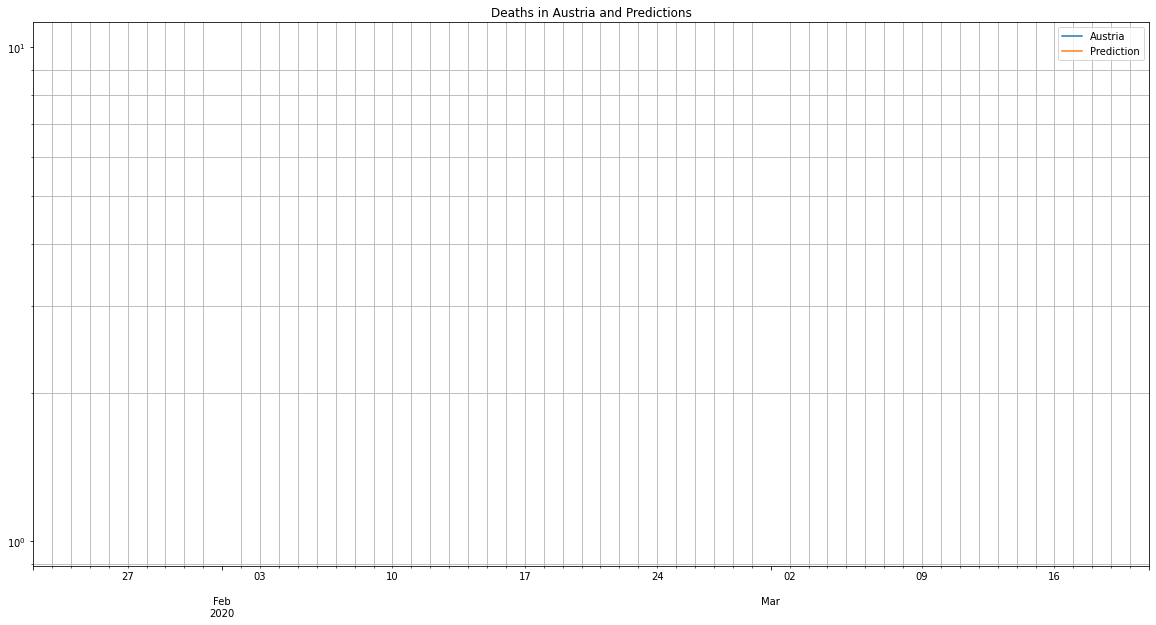

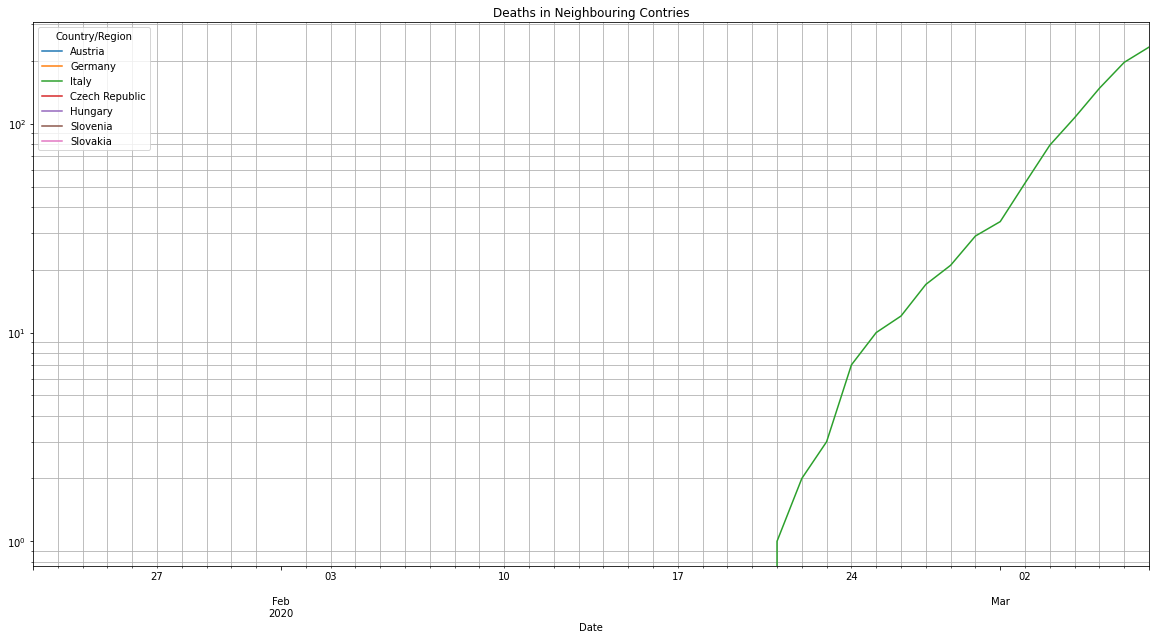

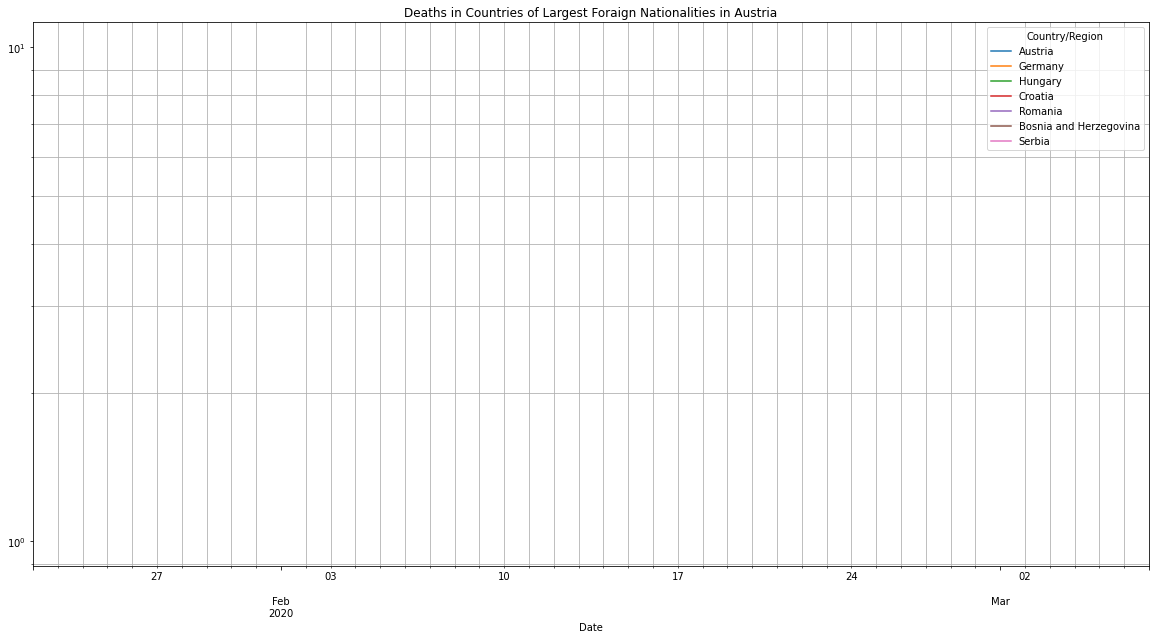

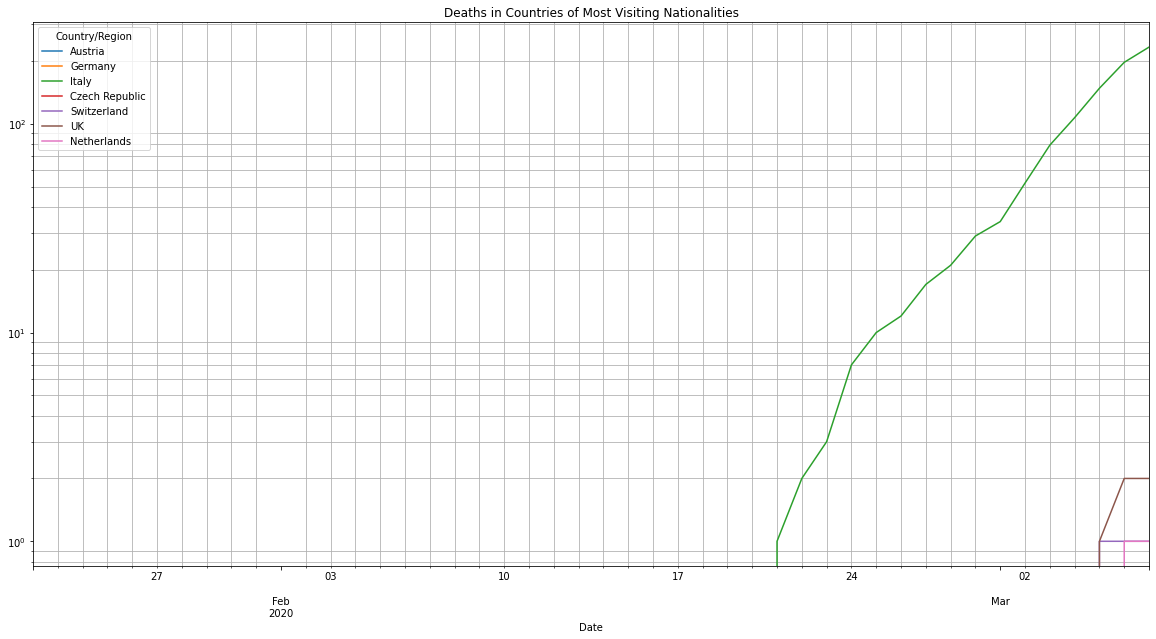

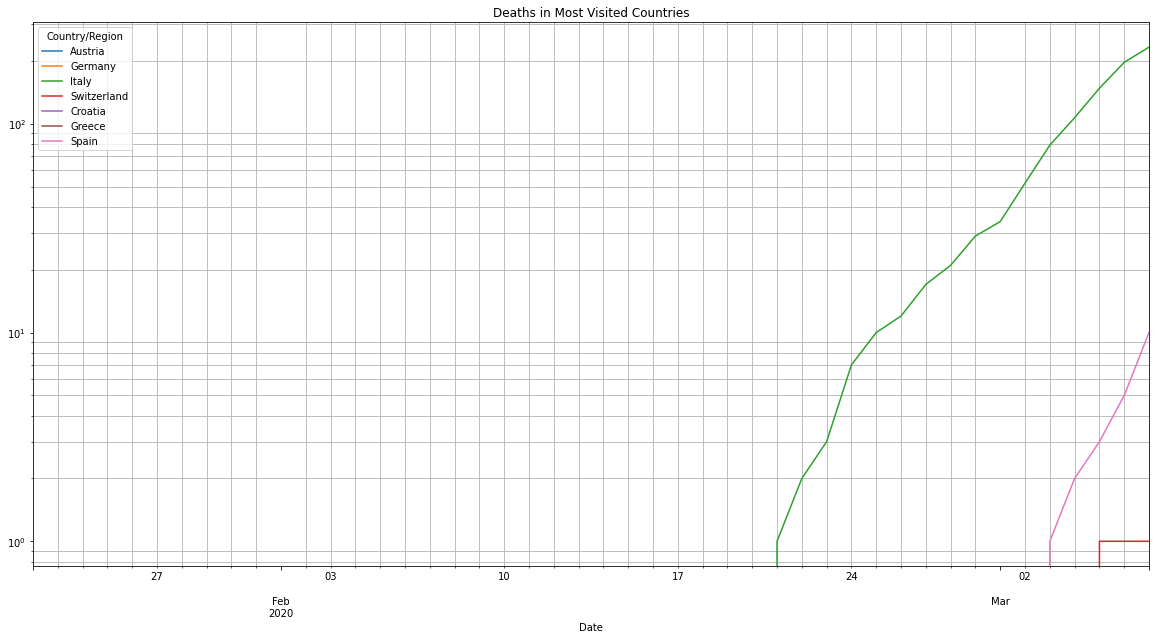

In [13]:
import lib.csse_covid_19_dataset.io as io
import os

latest_data_date = df_prep.index[-1].strftime("%Y-%m-%d")
    
directory = "export/{}/".format(latest_data_date)
if not os.path.exists(directory):
    os.makedirs(directory)

df_at_pred_title = "Deaths in {} and Predictions".format(data.at)
df_at_neighbours_title = "Deaths in Neighbouring Contries"
df_at_nationalities_title = "Deaths in Countries of Largest Foraign Nationalities in {}".format(data.at)
df_at_travel_incomming_title = "Deaths in Countries of Most Visiting Nationalities"
df_at_travel_outgoing_title = "Deaths in Most Visited Countries"

    
io.saveDataCsv(df_at_pred, directory, data_kind+"_"+df_at_pred_title)
io.saveDataCsv(df_at_neighbours, directory, data_kind+"_"+df_at_neighbours_title)
io.saveDataCsv(df_at_nationalities, directory, data_kind+"_"+df_at_nationalities_title)
io.saveDataCsv(df_at_travel_incomming, directory, data_kind+"_"+df_at_travel_incomming_title)
io.saveDataCsv(df_at_travel_outgoing, directory, data_kind+"_"+df_at_travel_outgoing_title)

io.plotAndSavePng(df_at_pred, df_at_pred_title, (20, 10), True, directory, data_kind+"_"+df_at_pred_title)
io.plotAndSavePng(df_at_neighbours, df_at_neighbours_title, (20, 10), True, directory, data_kind+"_"+df_at_neighbours_title)
io.plotAndSavePng(df_at_nationalities, df_at_nationalities_title, (20, 10), True, directory, data_kind+"_"+df_at_nationalities_title)
io.plotAndSavePng(df_at_travel_incomming, df_at_travel_incomming_title, (20, 10), True, directory, data_kind+"_"+df_at_travel_incomming_title)
io.plotAndSavePng(df_at_travel_outgoing, df_at_travel_outgoing_title, (20, 10), True, directory, data_kind+"_"+df_at_travel_outgoing_title)